# 초기 데이터 구성

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
import pandas as pd
from datetime import datetime, timedelta

xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

datas = {};
for col in xlsx:
    if col > 6: # startcol 7
        datas[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]
        
def datetime_range(start, end, delta):
        current = start
        while current < end:
                yield current
                current += delta
dts = [dt.strftime('%Y%m%d %H:%M') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(minutes = 15))]

df = pd.DataFrame(datas)

In [96]:
df = df.fillna(0)
sDatas = []

for idx in df['아파트1-104-1206']:
    sDatas.append(idx)

dts = [dt.strftime('%Y%m%d') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(days = 1))]

sData = {}
dtIdx = 0
for idx in range(3,len(sDatas),96):
    sData[dts[dtIdx]] = pd.Series(sDatas[idx: idx + 96])
    dtIdx += 1
sDf = pd.DataFrame(sData)
sDf = sDf.fillna(0)
sDf = sDf.transpose()
print(sDf)

             0      1      2      3      4      5      6      7      8   \
20180501  0.085  0.084  0.085  0.084  0.084  0.084  0.084  0.084  0.072   
20180502  0.051  0.050  0.050  0.051  0.050  0.050  0.050  0.046  0.030   
20180503  0.037  0.046  0.088  0.051  0.050  0.044  0.029  0.044  0.050   
20180504  0.064  0.074  0.085  0.084  0.065  0.065  0.086  0.084  0.074   
20180505  0.081  0.054  0.052  0.041  0.032  0.052  0.053  0.045  0.030   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
20190426  0.029  0.025  0.023  0.007  0.008  0.008  0.013  0.024  0.020   
20190427  0.007  0.007  0.007  0.007  0.025  0.021  0.007  0.007  0.007   
20190428  0.075  0.065  0.062  0.065  0.075  0.077  0.059  0.054  0.054   
20190429  0.019  0.024  0.015  0.007  0.007  0.024  0.023  0.008  0.007   
20190430  0.022  0.023  0.008  0.006  0.007  0.013  0.024  0.015  0.007   

             9   ...     86     87     88     89     90     91     92     93  \
20180501  0.065  ..

In [97]:
scaled = StandardScaler().fit_transform(sDf)
print(scaled)

[[ 0.36029058  0.31860553  0.35106608 ...  0.42521556  0.2771231
  -0.14679687]
 [-0.12465585 -0.1437842  -0.12777966 ... -0.18437142 -0.18796646
  -0.17490855]
 [-0.32433967 -0.19818299  0.39211    ...  0.29762759  0.31940397
   0.23271079]
 ...
 [ 0.21765927  0.06021127  0.03639602 ... -0.56713534 -0.765805
  -0.75119796]
 [-0.58107602 -0.49737635 -0.60662539 ... -0.75142908 -0.77989862
  -0.75119796]
 [-0.53828662 -0.51097605 -0.70239454 ... -0.87901705 -0.87855398
  -0.84958884]]


In [98]:
pca = PCA(n_components=2)

pca.fit(scaled);
pca_columns = ['x', 'y'];
after_pca = pca.transform(scaled)
print(scaled.shape)

sDf_pca = pd.DataFrame(after_pca, columns = pca_columns)
print(sDf_pca)

(365, 96)
            x         y
0    2.350971  0.756726
1    0.819896  1.361105
2    1.089495  1.553746
3    2.954181  0.238683
4    4.585859  4.067496
..        ...       ...
360 -5.504917 -1.470903
361 -2.810191  1.397020
362 -1.162364  0.603618
363 -5.447782 -0.962524
364 -6.965019 -0.538543

[365 rows x 2 columns]


In [29]:
import matplotlib.pyplot as plt

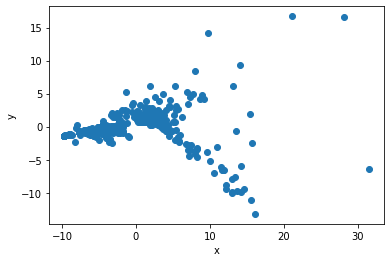

In [99]:
x_axis_data = sDf_pca['x']
y_axis_data = sDf_pca['y']

plt.scatter(x_axis_data, y_axis_data, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
from sklearn.cluster import KMeans

In [100]:
points = sDf.values
kmeans = KMeans(n_clusters=6).fit(points)
kmeans.cluster_centers_

array([[0.18792857, 0.18028571, 0.19142857, 0.17507143, 0.17271429,
        0.17478571, 0.16642857, 0.16692857, 0.14507143, 0.13271429,
        0.1255    , 0.16328571, 0.18478571, 0.22171429, 0.20242857,
        0.2175    , 0.23571429, 0.19471429, 0.18521429, 0.20157143,
        0.20235714, 0.21185714, 0.20221429, 0.17771429, 0.19342857,
        0.20542857, 0.17421429, 0.18214286, 0.18814286, 0.13528571,
        0.09607143, 0.08342857, 0.07935714, 0.08957143, 0.09821429,
        0.11592857, 0.10464286, 0.09607143, 0.09485714, 0.08707143,
        0.07878571, 0.09657143, 0.07635714, 0.07635714, 0.0755    ,
        0.07714286, 0.0735    , 0.07521429, 0.07492857, 0.07335714,
        0.07321429, 0.0735    , 0.0875    , 0.08671429, 0.0735    ,
        0.05371429, 0.05464286, 0.0515    , 0.05278571, 0.05985714,
        0.0745    , 0.05807143, 0.05264286, 0.05157143, 0.05271429,
        0.05214286, 0.05142857, 0.05242857, 0.05142857, 0.0525    ,
        0.05178571, 0.05164286, 0.05192857, 0.05

In [73]:
import seaborn as sns

In [104]:
sDf_pca["cluster"] = kmeans.labels_
sDf_pca["data"] = sDf.index

print(sDf_pca);

            x         y  cluster      data
0    2.350971  0.756726        5  20180501
1    0.819896  1.361105        5  20180502
2    1.089495  1.553746        5  20180503
3    2.954181  0.238683        5  20180504
4    4.585859  4.067496        5  20180505
..        ...       ...      ...       ...
360 -5.504917 -1.470903        1  20190426
361 -2.810191  1.397020        1  20190427
362 -1.162364  0.603618        1  20190428
363 -5.447782 -0.962524        1  20190429
364 -6.965019 -0.538543        3  20190430

[365 rows x 4 columns]


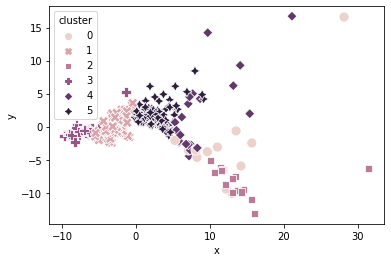

In [105]:
sns.scatterplot(x='x', y="y", hue="cluster", style="cluster", s = 100, data = sDf_pca)
plt.show()

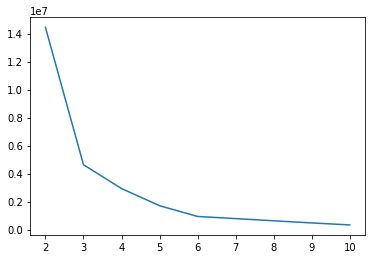

In [106]:
wcss = []
ks = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(sDf_pca)
    wcss.append(kmeans.inertia_)
    ks.append(k)
    
plt.plot(ks, wcss)